In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

#engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
#    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

#heart_df = pd.read_sql_query('select * from heartdisease',con=engine)

heart_df = pd.read_csv('heart.csv')
#engine.dispose()

heart_df.info()
heart_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
X = heart_df.iloc[:, :13]
y = heart_df.iloc[:, 13]

X = X.replace(to_replace='?', value=0)

y = np.where(y > 0, 0, 1)

In [3]:
scaler = StandardScaler()
x_std = scaler.fit_transform(X)

pca_ = PCA(n_components=2)
x_pca = pca_.fit_transform(x_std)

Split the data randomly into two. Apply k-means using two, three, and four as the number of clusters, as you did when you were exploring consistency earlier in this checkpoint. Assess the consistency of the solutions using visualization. Which one seems to be the best?

In [4]:
x_half1, x_half2, x_pcahalf1, x_pcahalf2 = train_test_split(x_std,
                                                           x_pca,
                                                           test_size=.5)



Apply k-means on the whole dataset by setting k equal to 2, 3, and 4. Get the ARI score for each of them. Which model is best?

In [5]:
k_means2 = KMeans(n_clusters=2)
k_means2.fit(x_pca)

y_pred2 = k_means2.fit_predict(x_pca)

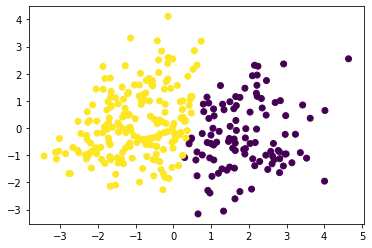

In [6]:
plt.scatter(x_pca[:,0],x_pca[:,1], c=y_pred2)

In [7]:
k_means3 = KMeans(n_clusters=3)
k_means3.fit(x_pca)

y_pred3 = k_means3.fit_predict(x_pca)

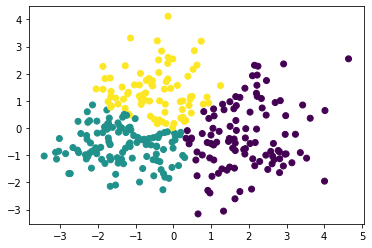

In [8]:
plt.scatter(x_pca[:,0],x_pca[:,1], c=y_pred3)

In [9]:
k_means4 = KMeans(n_clusters=4)
k_means4.fit(x_pca)

y_pred4 = k_means4.fit_predict(x_pca)

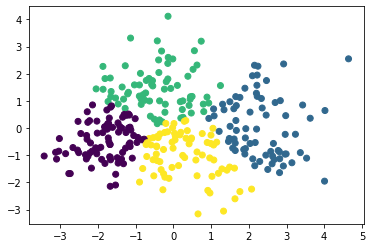

In [10]:
plt.scatter(x_pca[:,0],x_pca[:,1], c=y_pred4)

In [11]:
print("ARI for two cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, y_pred2)))
print("ARI for three cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, y_pred3)))
print("ARI for four cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, y_pred4)))

ARI for two cluster k-means: 0.37046394171584685
ARI for three cluster k-means: 0.27457936747594475
ARI for four cluster k-means: 0.2405150027747196


Apply k-means on the whole dataset by setting k equal to 2, 3, and 4. Get the silhouette coefficient for each of them. Which model is best?

In [13]:
print("Silhouette score for two cluster k-means: {}".format(
    metrics.silhouette_score(x_std, y_pred2, metric='euclidean')))
print("Silhouette score for three cluster k-means: {}".format(
    metrics.silhouette_score(x_std, y_pred3, metric='euclidean')))
print("Silhouette score for four cluster k-means: {}".format(
    metrics.silhouette_score(x_std, y_pred4, metric='euclidean')))

Silhouette score for two cluster k-means: 0.16691235755398443
Silhouette score for three cluster k-means: 0.1128505467297309
Silhouette score for four cluster k-means: 0.08454044003306796
